In [2]:
#Use if packages are not installed
#pip install pandas
#pip install numpy
#pip install matplotlib
#pip install statsmodels

In [3]:
import pandas as pd
import numpy as np

#Importing data from csv file, data sourced from the World Bank
#data = pd.read_csv('YOUR_CSV_DIRECTORY/GDP_ENERGY.csv')
data = pd.read_csv('GDP_ENERGY.csv')

#Replacing all '..' values with NaN
data.replace('..', np.nan, inplace=True)

In [4]:
data
#The data is of all countries in the world from 1990 to 2023
#There are four variables of interest:

#GDP per capita, PPP (constant 2017 international $)
#Renewable electricity output (% of total electricity output)
#CO2 emissions (metric tons per capita)
#Renewable energy consumption (% of total final energy consumption)

,Country Name,Country Code,Time,Time Code,"GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]",Renewable electricity output (% of total electricity output) [EG.ELC.RNEW.ZS],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]
0,Afghanistan,AFG,1990,YR1990,NaN,67.73049645,0.191389345,23
1,Afghanistan,AFG,1991,YR1991,NaN,67.98029557,0.180673786,23.69
2,Afghanistan,AFG,1992,YR1992,NaN,67.9943101,0.126516979,27.38
3,Afghanistan,AFG,1993,YR1993,NaN,68.34532374,0.109105697,28.5
4,Afghanistan,AFG,1994,YR1994,NaN,68.70451237,0.096637746,30.14
...,...,...,...,...,...,...,...,...
7373,Zimbabwe,ZWE,2019,YR2019,2203.396809,NaN,0.663338328,81.52
7374,Zimbabwe,ZWE,2020,YR2020,1990.319419,NaN,0.530483547,84.36
7375,Zimbabwe,ZWE,2021,YR2021,2115.144555,NaN,NaN,NaN
7376,Zimbabwe,ZWE,2022,YR2022,2207.957033,NaN,NaN,NaN


In [5]:
#Checking column names that need to be changed
data.columns

Index(['Country Name', 'Country Code', 'Time', 'Time Code',
       'GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]',
       'Renewable electricity output (% of total electricity output) [EG.ELC.RNEW.ZS]',
       'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]',
       'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]'],
      dtype='object')

In [6]:
#Dropping unwanted columns and changing column names to be simple and manageable
data_clean = data.drop(['Country Code', 'Time Code'], axis = 1)

#Changing column names

data_clean = data_clean.rename(columns={'Country Name' : 'Country',
                            'Time' : 'Year',
                            'GDP per capita, PPP (constant 2017 international $) [NY.GDP.PCAP.PP.KD]' : 'GDPpc',
                            'Renewable electricity output (% of total electricity output) [EG.ELC.RNEW.ZS]' : 'R_Electricity',
                            'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]' : 'CO2',
                            'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]' : 'R_Energy'})

#Changing Year to datetime format and setting it as the index
data_clean['Year'] = pd.to_datetime(data_clean['Year'], format='%Y')
data_clean = data_clean.set_index('Year')

data_clean

#Changing the data type of the variables of interest to numeric

data_clean['GDPpc'] = pd.to_numeric(data_clean['GDPpc'])
data_clean['R_Electricity'] = pd.to_numeric(data_clean['R_Electricity'])
data_clean['CO2'] = pd.to_numeric(data_clean['CO2'])
data_clean['R_Energy'] = pd.to_numeric(data_clean['R_Energy'])

data_clean.head()

,Country,GDPpc,R_Electricity,CO2,R_Energy
Year,,,,,
1990-01-01,Afghanistan,NaN,67.730496,0.191389,23.00
1991-01-01,Afghanistan,NaN,67.980296,0.180674,23.69
1992-01-01,Afghanistan,NaN,67.994310,0.126517,27.38
1993-01-01,Afghanistan,NaN,68.345324,0.109106,28.50
1994-01-01,Afghanistan,NaN,68.704512,0.096638,30.14


In [7]:
#List of all countries in the dataset

data_clean['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Islands',

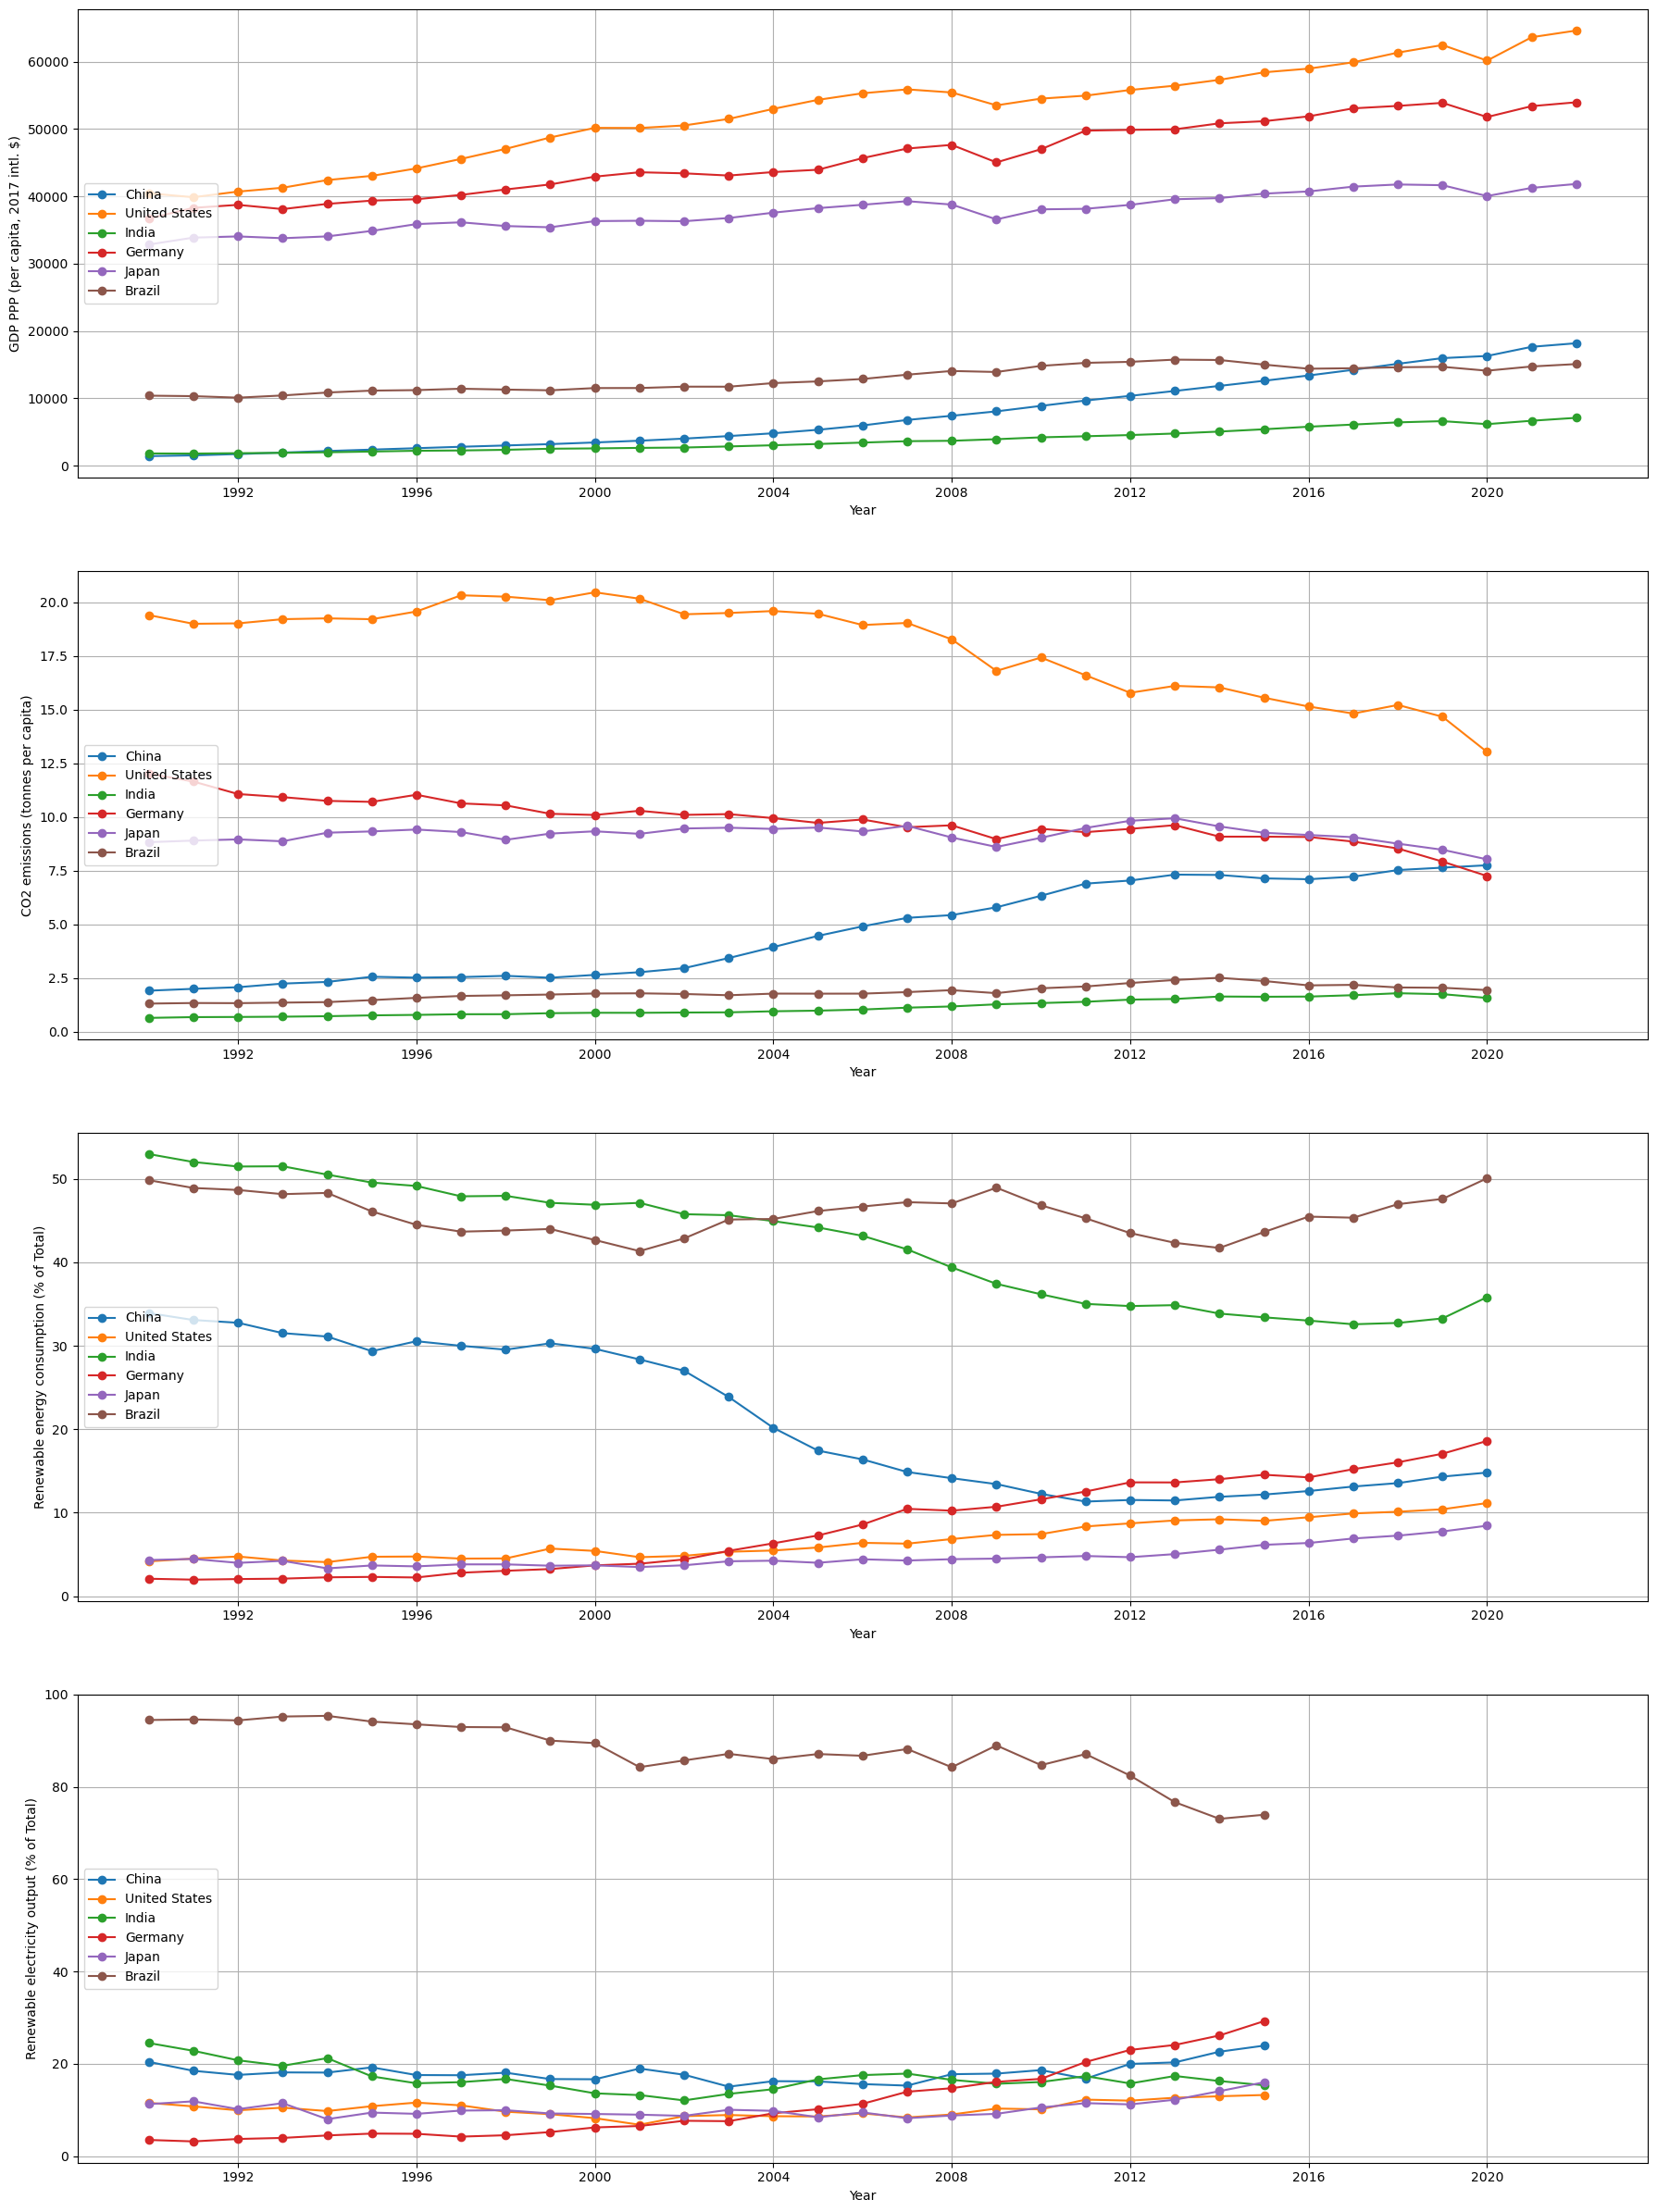

In [8]:
#import matplotlib for plotting
import matplotlib.pyplot as plt

#Plotting GDPpc, R_Electricity, CO2 and R_Energy for 6 countries

#List of countries to plot
countries = ['China', 'United States', 'India', 'Germany', 'Japan', 'Brazil']

#Dictionary with variables as keys and labels for y axis as values
var_label = {'GDPpc': 'GDP PPP (per capita, 2017 intl. $)',
    'CO2': 'CO2 emissions (tonnes per capita)',
    'R_Energy': 'Renewable energy consumption (% of Total)',
    'R_Electricity': 'Renewable electricity output (% of Total)'}


# Create a figure and a set of 5 subplots
fig, axs = plt.subplots(4, 1, figsize=(18, 24), sharex = True) #Using sharex = True to align plots

# Loop through each measure and plot data for the selected countries for said measure
for ax, (measure, label) in zip(axs, var_label.items()):
    for country in countries:
        country_df = data_clean[(data_clean['Country'] == country)]
        valid_years = country_df[measure].dropna()  # Drop NAs
        ax.plot(valid_years.index, valid_years, marker='o', linestyle='-', label=country)
    ax.set_ylabel(label)
    ax.set_xlabel('Year')
    ax.legend(loc = 'center left')
    ax.grid()
    ax.tick_params(labelbottom=True)

# Set common labels
plt.xlabel('Year')
#Separating the subplots and adjusting the space between them
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
plt.show()


In [9]:
#Adding log GDPpc  and logGDPpc squared variable to data_clean for regression analysis
data_clean['GDPpc_log'] = np.log(data_clean['GDPpc'])
data_clean['GDPpc_log2'] = data_clean['GDPpc_log'] ** 2

In [10]:
#Creating a linear regression model (1) for R_Energy on GDPpc_log and GDPpc_log2
import statsmodels.api as sm


df_Energy_noNA = data_clean.dropna(subset = ['GDPpc_log', 'GDPpc_log2', 'R_Energy'])
X = df_Energy_noNA[['GDPpc_log', 'GDPpc_log2']]
X = sm.add_constant(X)
y = df_Energy_noNA['R_Energy']

modelGDP_Energy = sm.OLS(y, X).fit()

print(modelGDP_Energy.summary())

                            OLS Regression Results                            
Dep. Variable:               R_Energy   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     4149.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        21:09:41   Log-Likelihood:                -25172.
No. Observations:                5719   AIC:                         5.035e+04
Df Residuals:                    5716   BIC:                         5.037e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        611.8560     13.893     44.041      0.0

In [11]:
#Linear regression model (2) for CO2 on R_Energy

df_CO2_noNA = data_clean.dropna(subset = ['R_Energy', 'CO2'])
X = df_CO2_noNA[['R_Energy']]
X = sm.add_constant(X)
y = df_CO2_noNA['CO2']

modelEnergy_CO2 = sm.OLS(y, X).fit()

print(modelEnergy_CO2.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     2453.
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        21:09:41   Log-Likelihood:                -17258.
No. Observations:                5866   AIC:                         3.452e+04
Df Residuals:                    5864   BIC:                         3.453e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5073      0.089     84.599      0.0